Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV #Hypertuning & GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

Data Loading & Understanding

In [2]:
# read csv data to a pandas dataframe
df = pd.read_csv("autism.csv")

Initial Inspection

In [3]:
df.shape

(800, 22)

In [4]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [6]:
# display all the columns of a dataframe
pd.set_option('display.max_columns', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
# convert age column datatype to integer
df['age'] = df['age'].astype(int)

In [9]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [10]:
for col in df.columns:
    numerical_features = ["ID","age","result"]
    if col not in numerical_features:
        print(col, df[col].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [11]:
# dropping ID & age_desc column
df = df.drop(columns=["ID","age_desc"])

In [12]:
df.shape

(800, 20)

In [13]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [14]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [15]:
# define the mapping dict for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Aruba": "Netherlands",
    "Hong Kong": "China"
}

# replace values in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Sri Lanka',
       'Russia', 'Bolivia', 'Azerbaijan', 'Armenia', 'Serbia', 'Ethiopia',
       'Sweden', 'Iceland', 'China', 'Angola', 'Germany', 'Spain',
       'Tonga', 'Pakistan', 'Iran', 'Argentina', 'Japan', 'Mexico',
       'Nicaragua', 'Sierra Leone', 'Czech Republic', 'Niger', 'Romania',
       'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'], dtype=object)

In [16]:
# Target class distribution
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

Highly Imbalanced Dataset with ratio of 1:6

**Insights**
1. missing values in ethnicity & relation
2. age_desc column has only 1 unique value, so removed as not important for prediction
3. fixed the country names
4. identified class imbalance in target column

Exploratory Data Analysis (EDA)

In [17]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical Columns:
- age
- result

In [18]:
# setting the theme
sns.set_theme(style="darkgrid")

Distirbution Plots

Mean:  27.96375
Median:  24.0


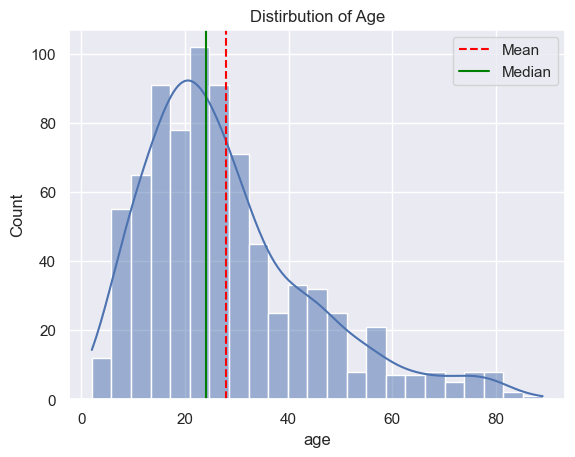

In [20]:
# histogram for "age"
sns.histplot(df["age"], kde=True) # kde = kernel distirbution curve
plt.title("Distirbution of Age")

# mean & median
age_mean = df["age"].mean()
print("Mean: ", age_mean)
age_median = df["age"].median()
print("Median: ", age_median)
# vertical lines for mean & median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")
plt.legend()
 
plt.show()

Above data is "Right Skewed", so Mean > Median

Mean:  8.537303106501248
Median:  9.605299308


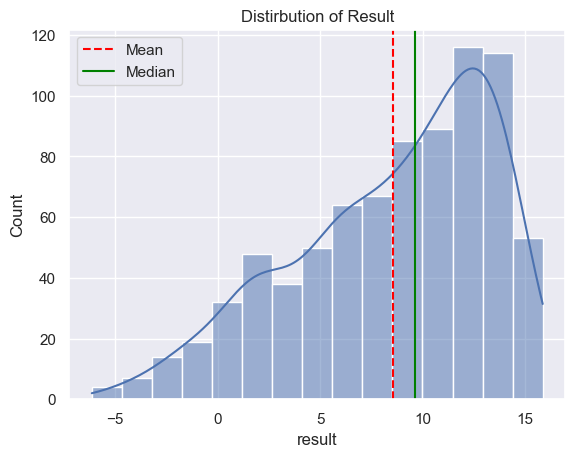

In [21]:
# histogram for "result"
sns.histplot(df["result"], kde=True) # kde = kernel distirbution curve
plt.title("Distirbution of Result")

# mean & median
result_mean = df["result"].mean()
print("Mean: ", result_mean)
result_median = df["result"].median()
print("Median: ", result_median)
# vertical lines for mean & median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")
plt.legend()
 
plt.show()

Above data is "Left Skewed", so Median > Mean

Box Plots for Identifying Outliers in the Numerical Columns

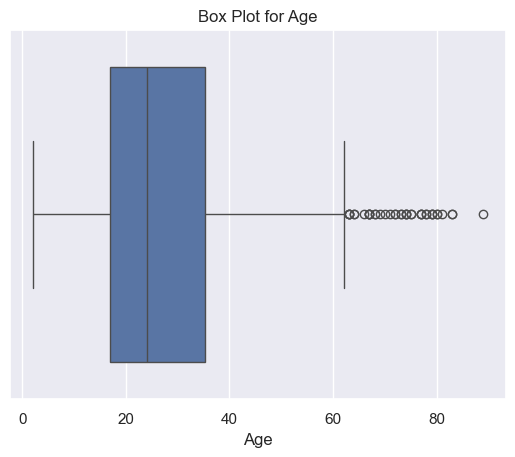

In [22]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

1. The circles reperesent the outliers
2. The black line in the mid of the blue box represents median - 50%ile
3. The black left boundary line of the blue box is the 1st Quantile (Q1) - 25%ile
4. The black right boundary line of the blue box is the 3rd Quantile (Q3) - 75%ile
5. Q3 - Q1 = Inter Quantile Range (IQR)
6. Outliers = 1.5 * IQR

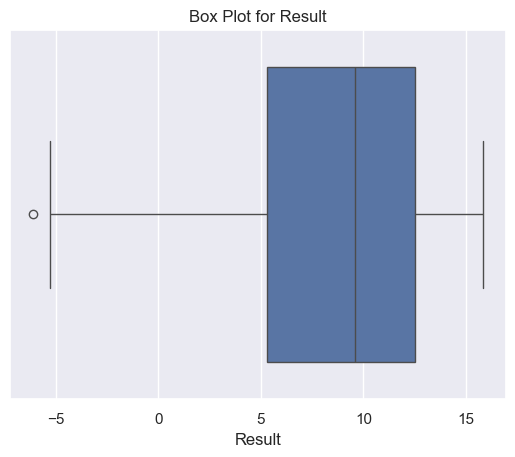

In [23]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for Result")
plt.xlabel("Result")
plt.show()

In [25]:
# count the outliers using IQR Methods
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
len(age_outliers)

39

In [26]:
# count the outliers using IQR Methods
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]
len(result_outliers)

1

Univariate Analysis of Categorical Columns

In [27]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

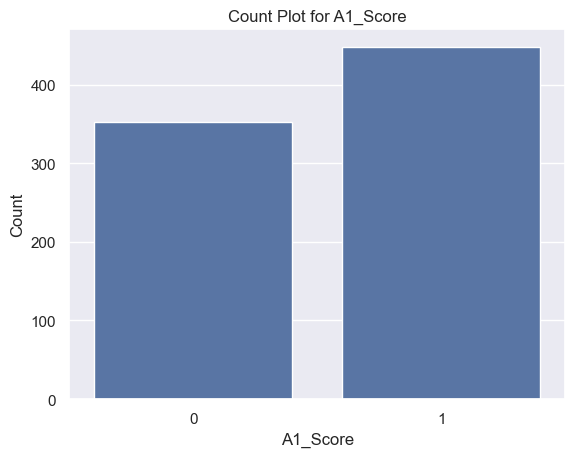

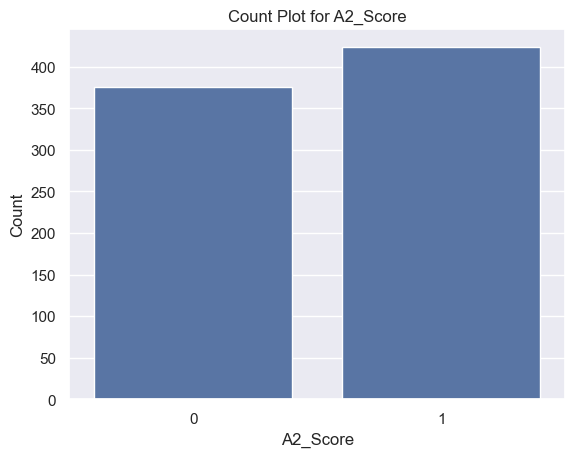

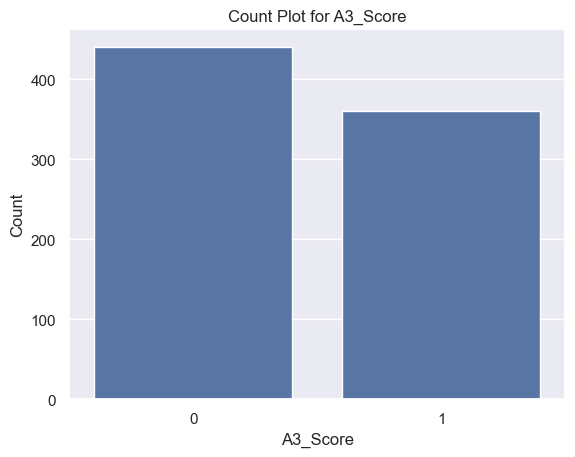

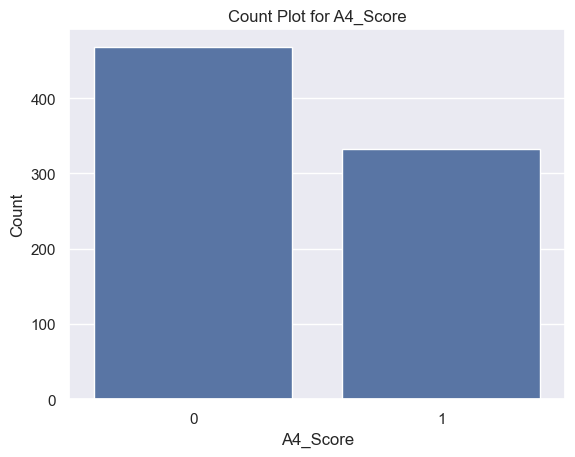

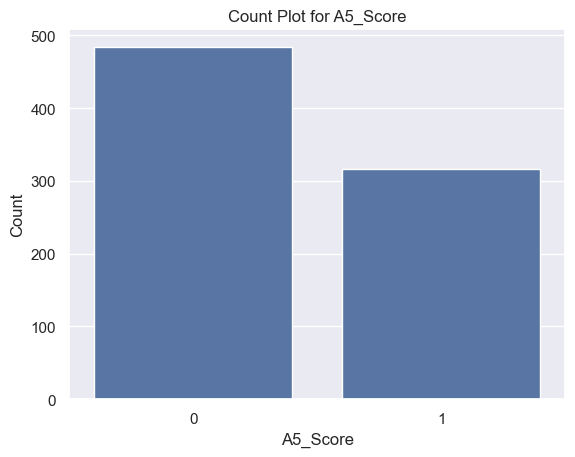

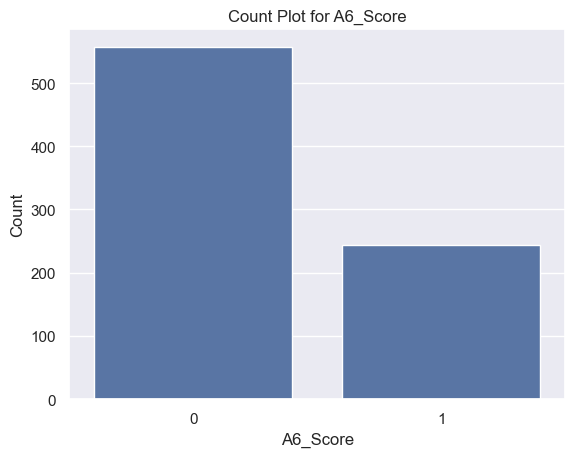

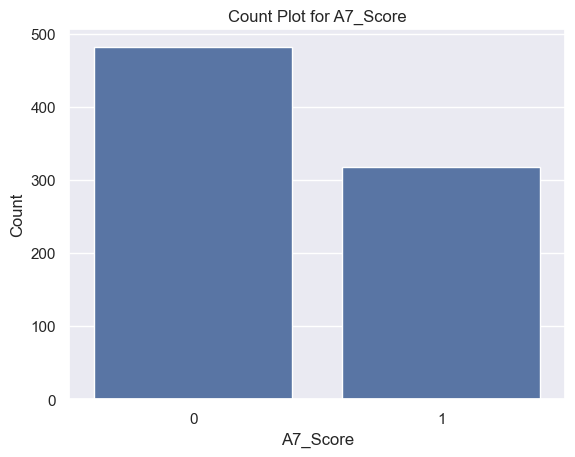

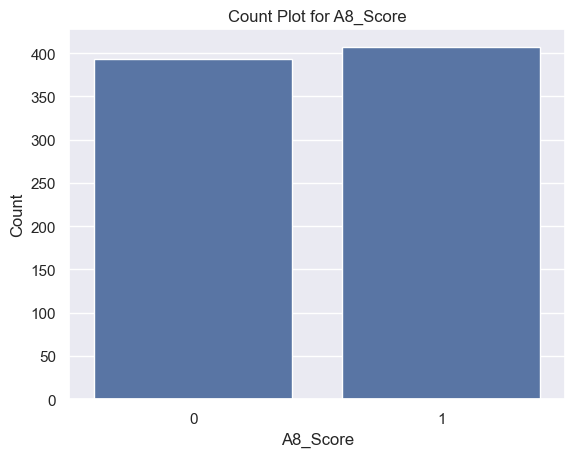

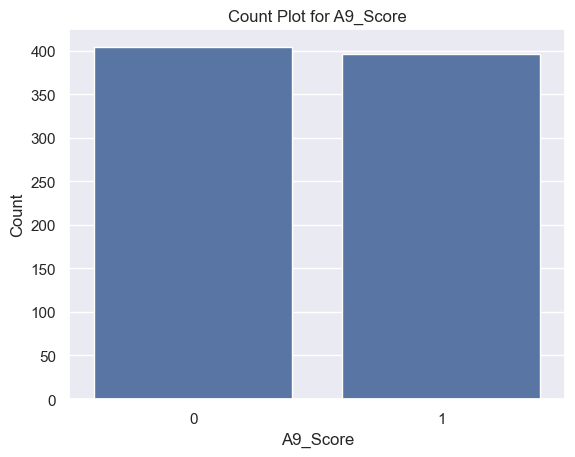

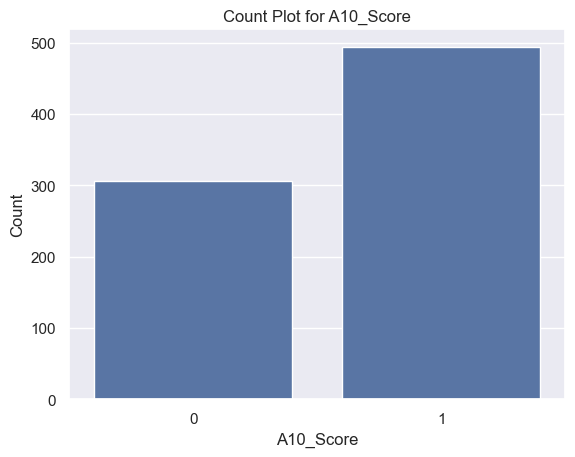

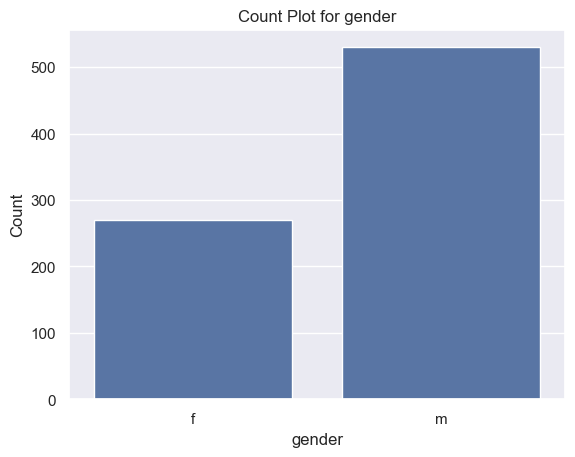

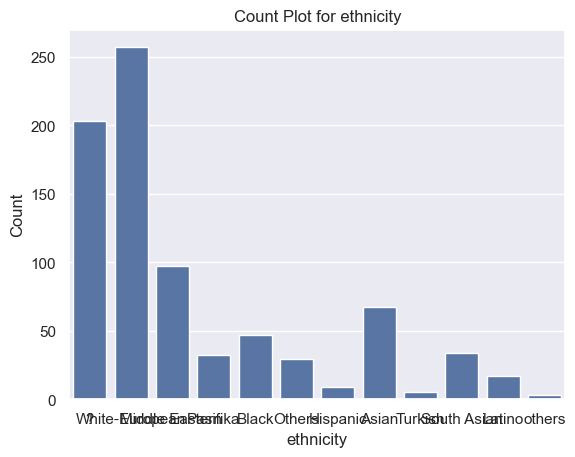

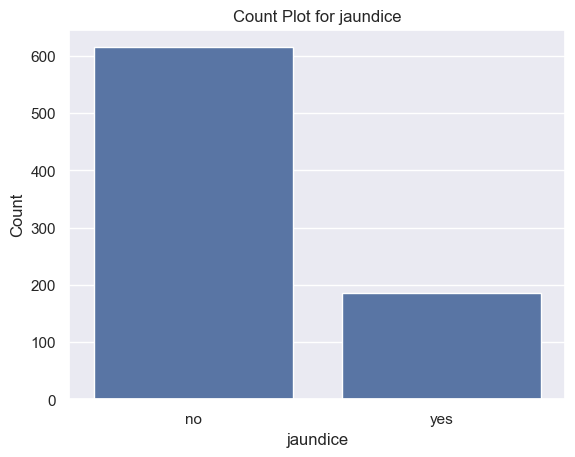

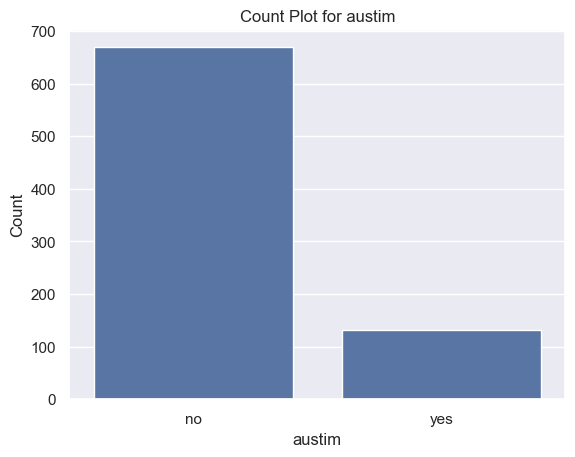

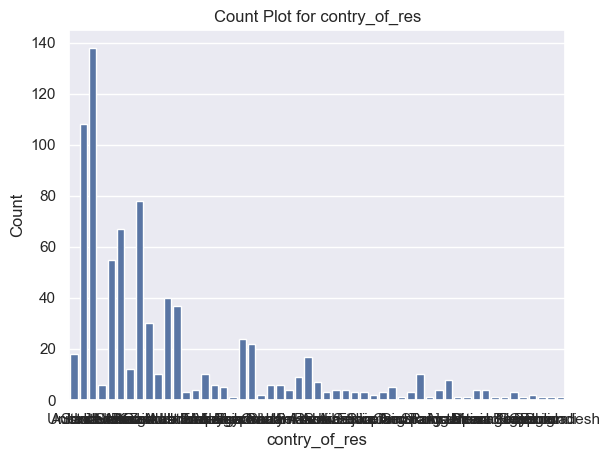

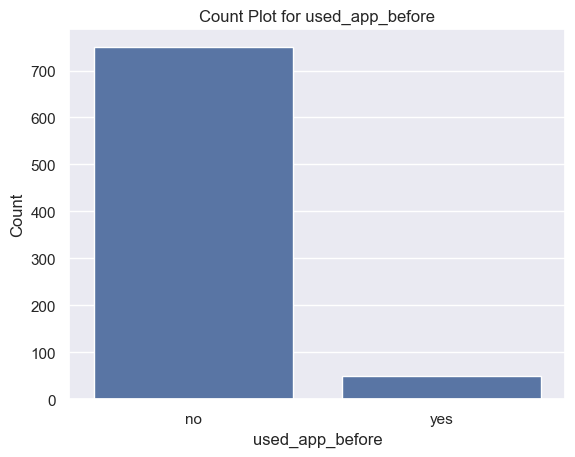

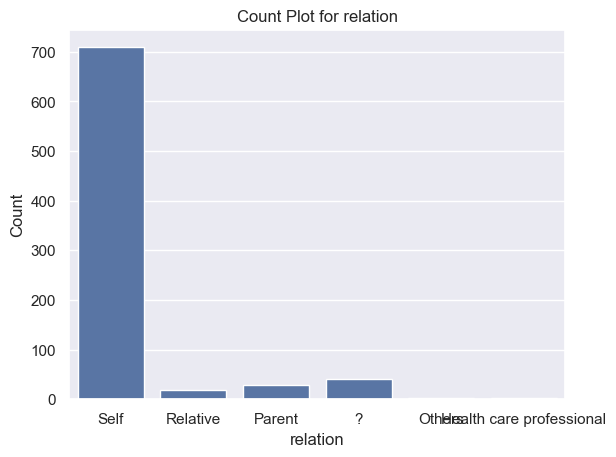

In [28]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    

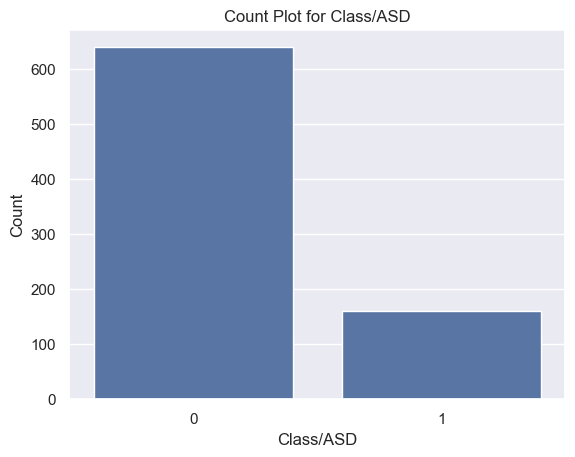

In [29]:
# count plot for the Target Column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

Handling missing values in ethnicity & relation columns

In [30]:
df["ethnicity"] = df["ethnicity"].replace(
    {"?": "Others",
     "others": "Others"}
    )
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [31]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
    )
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

Label Encoding

In [32]:
# identifying columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [34]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding & store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder # saving the encoder for this column

# save the encoder as a pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders, f)

In [35]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [36]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,5,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,22,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,51,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,51,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,43,0,-4.777286,1,0


Bivariate Analysis

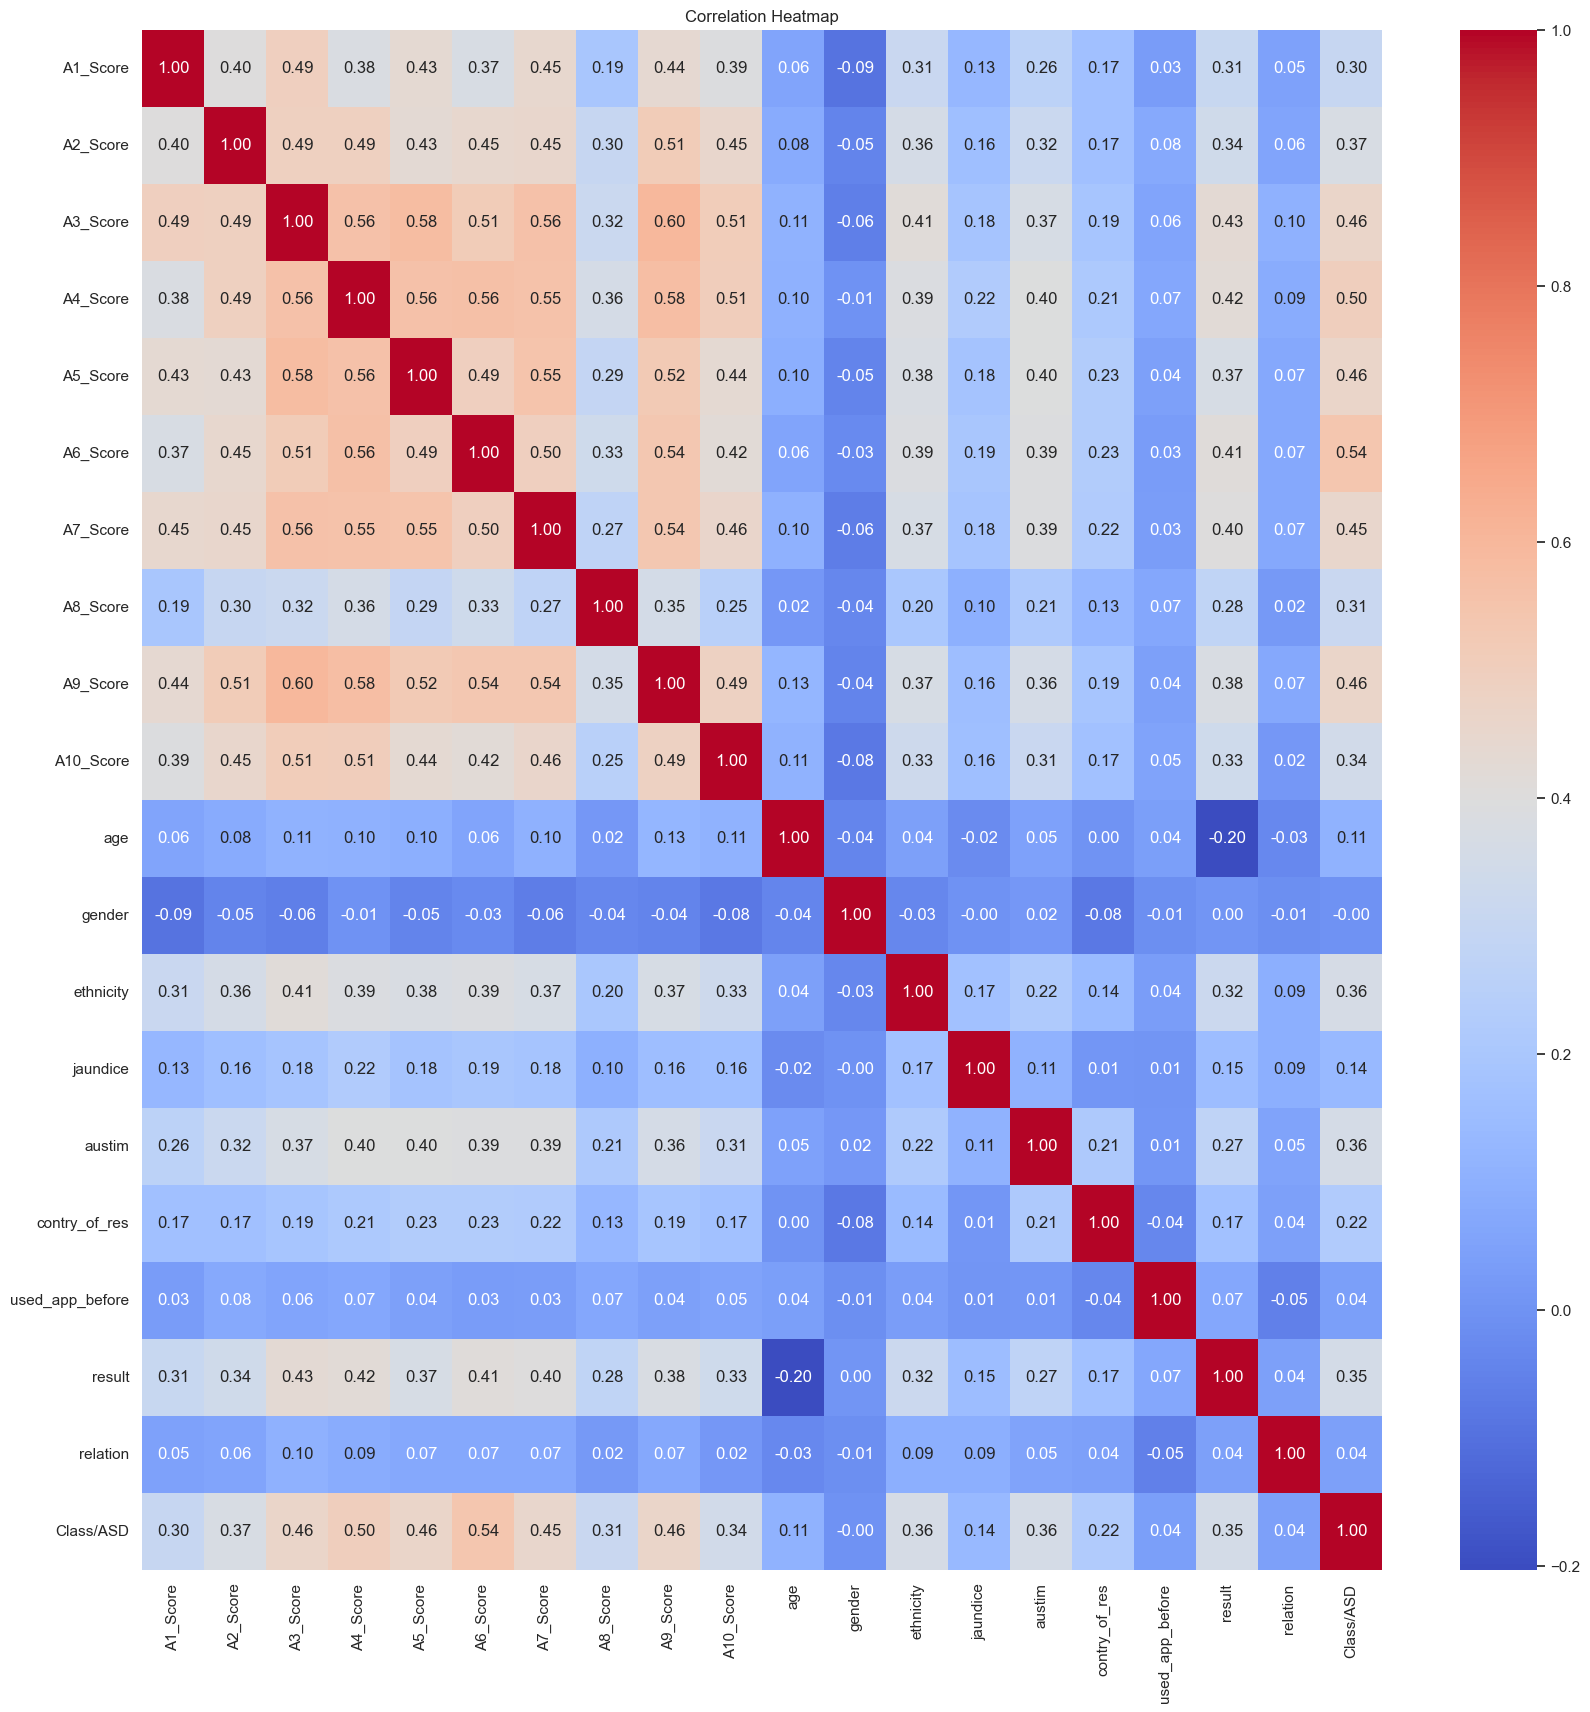

In [38]:
# correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insights from EDA**
1. Few outliers in the numerical columns (age - 39, results - 1)
2. Class Imbalance in the Target Column
3. Class Imbalance in the Categorical Features
4. No Highly correlated columns, so no columns dropped
5. Performed label encoding & saved the encoders

Data Pre-Processing

In [39]:
# function to replace the outliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median = df[column].median()
    
    # replace outliers with median values
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df

In [40]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

Train Test Split

In [41]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [43]:
X = df.drop(columns=["Class/ASD"])
Y = df["Class/ASD"]

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
print(X_train.shape, X_test.shape)

(640, 19) (160, 19)


In [46]:
print(Y_train.shape, Y_test.shape)

(640,) (160,)


In [47]:
Y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [48]:
Y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

Highyly Imbalanced 👆

SMOTE (Synthetic Minority Oversampling Technique)

In [49]:
smote = SMOTE(random_state=42)

In [50]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [51]:
print(X_train_smote.shape, Y_train_smote.shape)

(1030, 19) (1030,)


In [52]:
print(Y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


Model Training

In [55]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [57]:
# dictionary to store the cross validation results
cv_scores = {}

# 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")
    scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.91
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [58]:
cv_scores

{'Decision Tree': array([0.80582524, 0.88834951, 0.8592233 , 0.88349515, 0.87864078]),
 'Random Forest': array([0.90291262, 0.9223301 , 0.90776699, 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.86893204, 0.89805825, 0.89805825, 0.91262136, 0.90776699])}

Model Selection & Hyperparameter Tuning

In [59]:
# Initializing Models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [60]:
# Hyperparamter grid for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

In [62]:
# Hyperparameter Tuning for 3 tree based models
# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [64]:
# fit the models
random_search_dt.fit(X_train_smote, Y_train_smote)
random_search_rf.fit(X_train_smote, Y_train_smote)
random_search_xgb.fit(X_train_smote, Y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [65]:
# Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_
  
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")



Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy: 0.92


In [68]:
# save the best model
with open("autism_best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

Evaluation

In [70]:
# evaluate on test data
Y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))

Accuracy score:
 0.81875
Confusion Matrix:
 [[110  14]
 [ 15  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       124
           1       0.60      0.58      0.59        36

    accuracy                           0.82       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.82      0.82      0.82       160

